In this module, we will learn how to deal with variables which do not exhibit a linear relationship with the target variable. Furthermore, we will learn how to avoid the perils of overfitting and make a generalisable model.

Lets start off with a quick recap of simple linear regression. In the first example. we will try to model sales of an online retailer with the help of the marketing spend. Lets see how we go about it

In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1.1 Simple Linear Regression

### We will build a model using TV spend on advertisements to predict sales

In [2]:
# Reading the dataset

df = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/098bb2e9-83fb-48df-9dd1-fac56fbb25ca/advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data = df[["TV", "Sales"]]
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


<Axes: xlabel='TV', ylabel='Sales'>

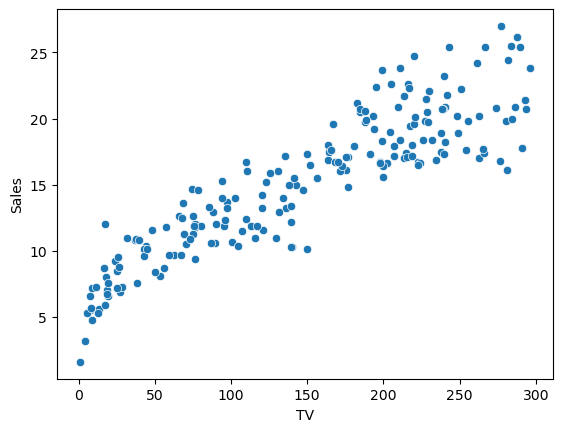

In [5]:
# Plotting a scatter plot

sns.scatterplot( data = data , x = 'TV' , y = 'Sales')

As you can infer from the above plot, the relationship between the two variables seems to be linear.

In [6]:
# Splitting the dataset into X and y

X = np.array(data['TV']).reshape(-1,1) # predictor variable
y = np.array(data['Sales']).reshape(-1,1) # response variable

In [7]:
# Building the regression model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [8]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
# y_pred

In [9]:
# Find the value of r squared
r2_score(y , y_pred)
# The advertising spends on TV explain about 81.21% of the variation in the Sales

0.8121757029987414

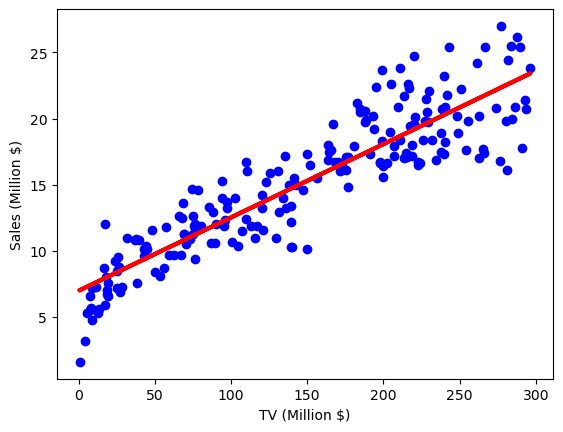

In [10]:
# Visualizing the model fit
plt.scatter( X , y , color = 'blue')
plt.plot(X , y_pred , color = 'red' , linewidth = 3)
plt.xlabel("TV (Million $)")
plt.ylabel("Sales (Million $)")
plt.show()

In [11]:
# Model Coefficients: beta0 and beta1
print(reg.intercept_)
print(reg.coef_)

[6.97482149]
[[0.05546477]]


In [12]:
# Metrics to assess model performance 
rss = np.sum(np.square(y - y_pred)) # sum of the squared difference between the actual and the predicted values
print(rss)
mse = mean_squared_error(y, y_pred) # MSE is RSS divided by the number of observations
print(mse)
rmse = mse**0.5 # RMSE is square root of MSE 
print(rmse)

1043.5487795590257
5.2177438977951285
2.2842381438447106


### Checking for assumptions

In [13]:
# Residual analysis
y_res = y - y_pred # Residuals

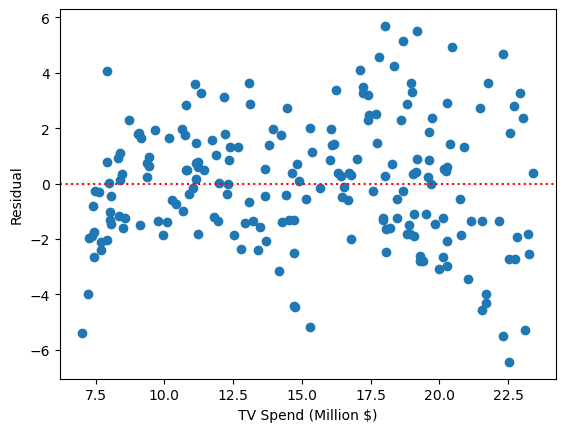

In [14]:
# Residual v/s predictions plot
data['res'] = y_res
plt.scatter( y_pred , data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("TV Spend (Million $)")
plt.ylabel("Residual")
plt.show()

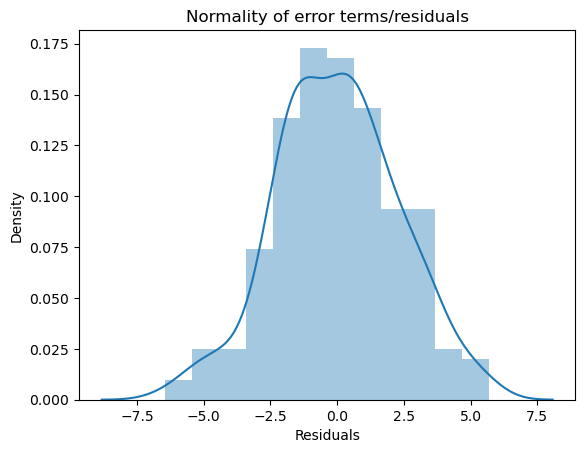

In [15]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Linear Regression Model Estimates  using Matrix Multiplications

In [16]:
# we use Numpy;s vstack to create a 2-d numpy array from two 1d-arrays and create x_mat
X_mat = np.vstack((np.ones(len(X)), X.T)).T

In [17]:
X_mat

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [18]:
# we can implement this using Numpy's linalg module's matrix inverse function and matrix multiplication
bet_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)

In [19]:
bet_hat

array([[6.97482149],
       [0.05546477]])